## Вариант 2.
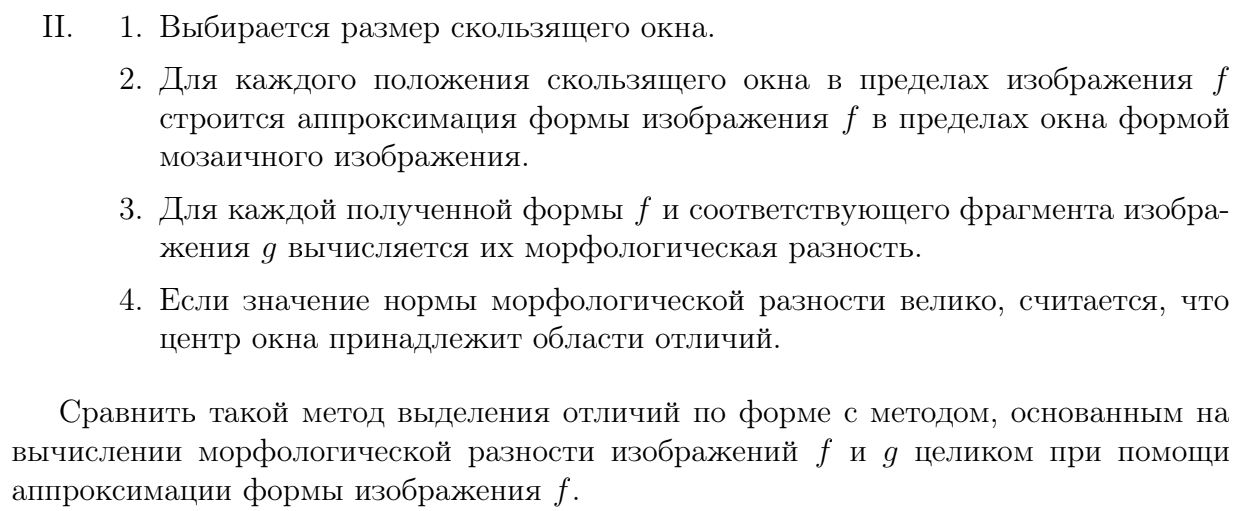

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
#загружаем изображения, преобразуем в grayscale
f = np.array(plt.imread('images/hw6_f.jpg'))[50:800].dot([0.07, 0.72, 0.21])
g = np.array(plt.imread('images/hw6_g.jpg'))[50:800].dot([0.07, 0.72, 0.21])

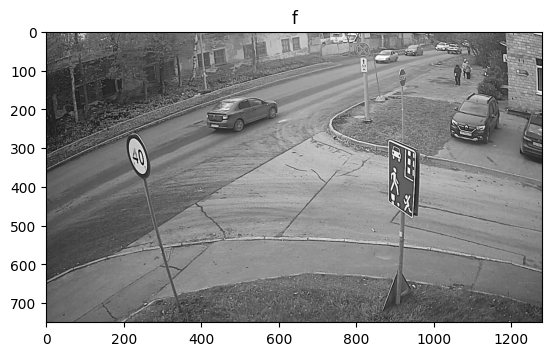

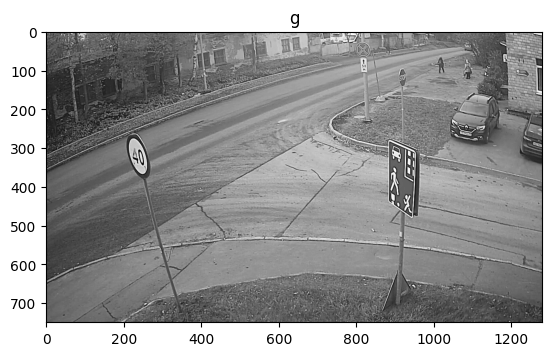

In [2]:
plt.title('f')
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.title('g')
plt.imshow(g, cmap='gray',  vmin=0, vmax=255)
plt.show()

In [3]:
window_shape = (50, 50)

In [8]:
def projection(g, f):
    cs = np.unique(f)
    for c in cs:
        g[f == c] = np.ma.array(g, mask=(f!=c)).mean()
    return g

In [9]:
def get_approximation(image):
    replacement = np.linspace(0, 255, 8)
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            index = np.argmin(np.abs(image[i, j] - replacement))
            image[i, j] = replacement[index]
    return image

In [10]:
def sliding_window(f, g, window_size, stride):
    assert f.shape == g.shape
    h, w = f.shape
    r_h = (h - window_size[0] + 1)//stride +1
    r_w = (w - window_size[1] + 1)//stride +1
    result = np.zeros((r_h, r_w))
    i, j = 0, 0
    for x in range(0, w-window_size[1]+1, stride):
        j = 0
        for y in range(0, h - window_size[0] + 1, stride):
            window_f = f[y:y+window_size[0], x:x+window_size[1]]
            window_g = g[y:y+window_size[0], x:x+window_size[1]]
            approximation = get_approximation(np.copy(window_f))
            pr = projection(np.copy(window_g), np.copy(approximation))
            norm = np.linalg.norm(pr-window_g)**2
            result[j, i] = norm
            j += 1
        i += 1
    return result  

In [11]:
res = sliding_window(np.copy(f), np.copy(g), window_shape, 10)

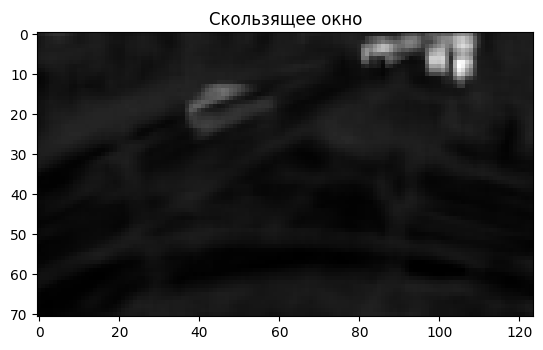

In [12]:
plt.title('Скользящее окно')
plt.imshow(res, cmap='gray')
plt.show()

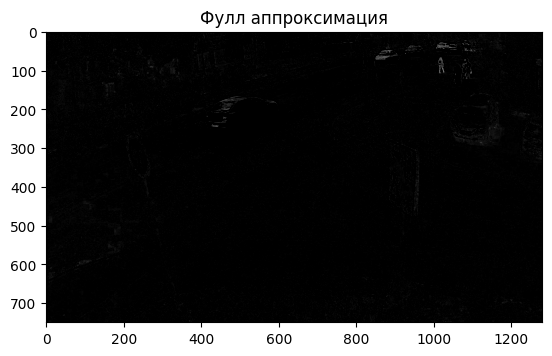

In [13]:
approximation = get_approximation(np.copy(f))
pr = projection(np.copy(g), np.copy(f))
plt.title('Фулл аппроксимация')
plt.imshow(pr-g, cmap='gray', vmin=0, vmax=255)
plt.show()